#**MNIST Digit Classification with Neural Network**

**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**

Importing the Dependencies

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [32]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [33]:
type(X_train)

numpy.ndarray

In [34]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [35]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [36]:
print(X_train[10].shape)

(28, 28)


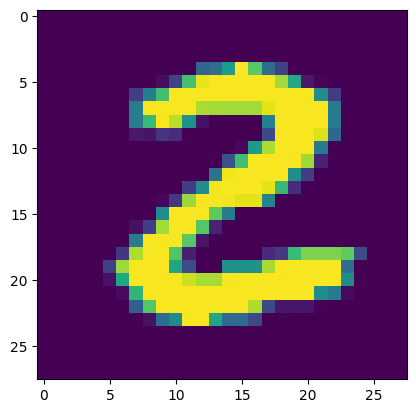

2


In [37]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

Image Lables

In [38]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [39]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [40]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [41]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [42]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [43]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9122
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1412 - accuracy: 0.9583
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1020 - accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0817 - accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0675 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0586 - accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0515 - accuracy: 0.9835
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0434 - accuracy: 0.9865
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0392 - accuracy: 0.9872
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

Training data accuracy = 98.9%

**Accuracy on Test data:**

In [45]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0985 - accuracy: 0.9742
0.9742000102996826


Test data accuracy = 97.1%

In [46]:
print(X_test.shape)

(10000, 28, 28)


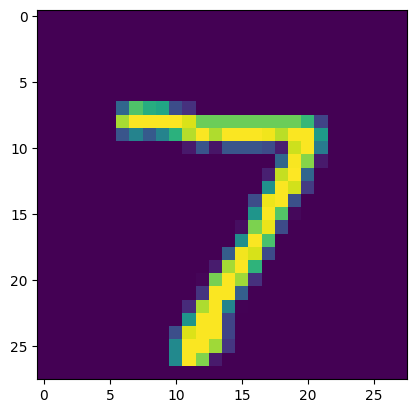

In [47]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [48]:
print(Y_test[0])

7


In [49]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [50]:
print(Y_pred.shape)

(10000, 10)


In [51]:
print(Y_pred[0])

[1.33707502e-03 2.21256429e-04 6.19575918e-01 9.95659411e-01
 3.34589254e-06 2.18621150e-01 1.45606265e-08 9.99999106e-01
 6.76583946e-02 3.90531868e-01]


model.predict() gives the prediction probability of each class for that data point

In [52]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [53]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 8, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 2, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

Confusin Matrix

In [54]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [55]:
print(conf_mat)

tf.Tensor(
[[ 961    0    2    3    1    2    4    4    2    1]
 [   0 1125    3    0    0    0    1    0    6    0]
 [   4    6  998    9    1    0    4    2    8    0]
 [   0    2    5  986    0   10    0    5    1    1]
 [   1    1    3    1  945    3    6    3    2   17]
 [   2    0    0   12    3  867    2    2    2    2]
 [   1    3    0    1    2    8  940    0    3    0]
 [   1    7    8    3    0    0    0 1000    5    4]
 [   3    0    2    4    5    2    2    3  949    4]
 [   2    3    1    6   11    3    0    9    3  971]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

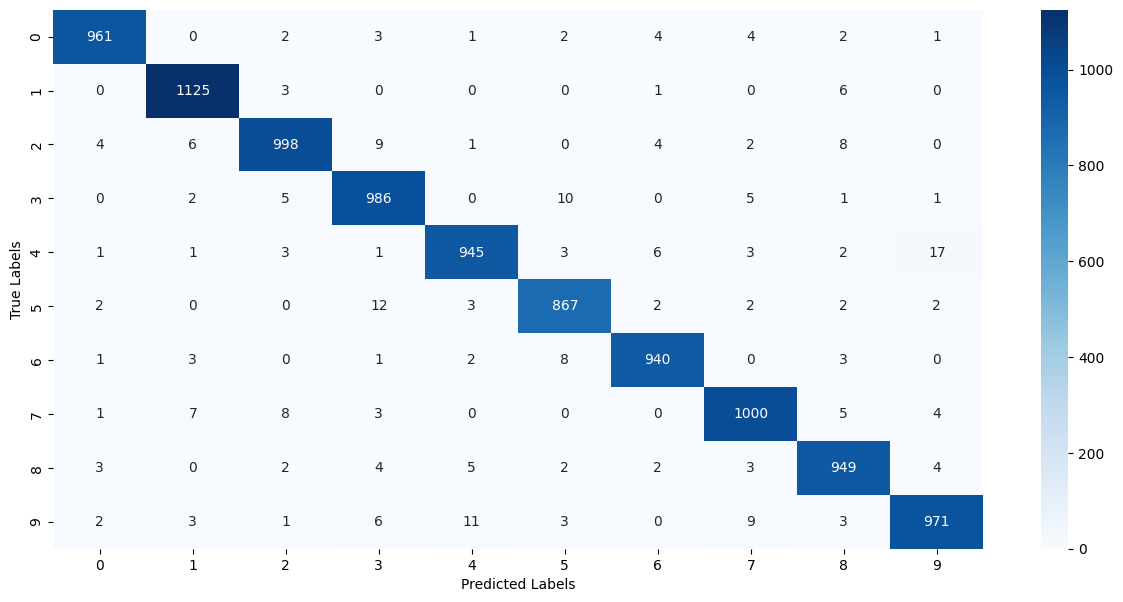

In [56]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

Prediction image link: https://camo.githubusercontent.com/3d9666a8f0c5658667292b74ca19295827c2b22a0e903db283998ae213e6f6e1/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67

In [57]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [58]:
type(input_image)

numpy.ndarray

In [59]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


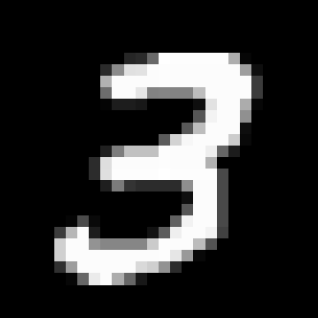

In [60]:
cv2_imshow(input_image)

In [61]:
input_image.shape

(318, 318, 3)

In [62]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [63]:
grayscale.shape

(318, 318)

In [64]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [65]:
input_image_resize.shape

(28, 28)

In [66]:
cv2_imshow(input_image_resize)

In [67]:
input_image_resize = input_image_resize/255

In [68]:
type(input_image_resize)

numpy.ndarray

In [69]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [70]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 30ms/step
[[1.62118905e-08 1.19722965e-04 1.50793483e-02 1.00000000e+00
  9.90409074e-11 9.14170444e-01 3.80485336e-14 1.97361787e-05
  1.25801593e-01 4.46385592e-02]]


In [71]:
input_pred_label = np.argmax(input_prediction)

In [72]:
print(input_pred_label)

3


**Predictive System**

Path of the image to be predicted: /content/MNIST_digit.png


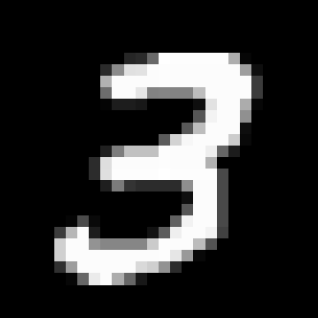

1/1 [==============================] - 0s 26ms/step
The Handwritten Digit is recognised as  3


In [73]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)